#  Find the scale incoming U for all runs

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns

# remove these when canyon records is turned into package or something like that:
import os
import sys

In [6]:
lib_path = os.path.abspath('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/PythonScripts/Paper1Figures/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import canyon_records 
records = canyon_records.main()

Base : 0.360 $\pm$ 0.011 ms$^-1$
higher\_Kbg : 0.357 $\pm$ 0.012 ms$^-1$
highest\_Kbg : 0.320 $\pm$ 0.019 ms$^-1$
higher\_N : 0.375 $\pm$ 0.013 ms$^-1$
highest\_N : 0.394 $\pm$ 0.015 ms$^-1$
lower\_N : 0.342 $\pm$ 0.010 ms$^-1$
higher\_f : 0.356 $\pm$ 0.011 ms$^-1$
low\_f : 0.387 $\pm$ 0.014 ms$^-1$
lower\_f : 0.374 $\pm$ 0.013 ms$^-1$
lowest\_f : 0.406 $\pm$ 0.019 ms$^-1$
highestKc\_lowKbg : 0.352 $\pm$ 0.010 ms$^-1$
higherKc\_lowKbg : 0.356 $\pm$ 0.010 ms$^-1$
higher\_Kc : 0.357 $\pm$ 0.010 ms$^-1$
high\_Kc : 0.352 $\pm$ 0.010 ms$^-1$
high2\_Kc : 0.345 $\pm$ 0.009 ms$^-1$
highest\_Kc : 0.345 $\pm$ 0.009 ms$^-1$
low\_U : 0.309 $\pm$ 0.010 ms$^-1$
lower\_U : 0.256 $\pm$ 0.010 ms$^-1$
lowest\_U : 0.134 $\pm$ 0.007 ms$^-1$
lowestU\_lowestN : 0.129 $\pm$ 0.006 ms$^-1$
lowestU\_highestN : 0.145 $\pm$ 0.011 ms$^-1$
lowestU\_lowestf : 0.145 $\pm$ 0.010 ms$^-1$
lowestU\_highestKbg : 0.113 $\pm$ 0.003 ms$^-1$


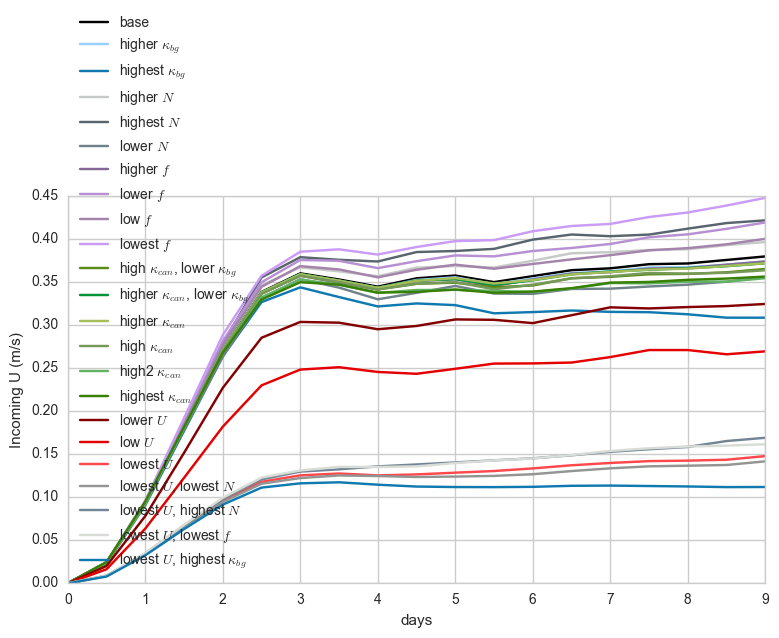

In [9]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)

for rec in records:
    filestate = ('/data/kramosmu/results/TracerExperiments/%s/%s/stateGlob.nc' 
                 %(rec.exp_code,rec.run_num))
   
    with Dataset(filestate, 'r') as nbl:
        u_ts = nbl.variables['U'][:,16:21,230:251,120]
        u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
        u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
    ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color=sns.xkcd_rgb[rec.color2],
            label=rec.label)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % (rec.paperName, u_mean, u_std))
    
ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)    

Barkley : 0.359 $\pm$ 0.010 ms$^-1$
Parabolic : 0.360 $\pm$ 0.011 ms$^-1$


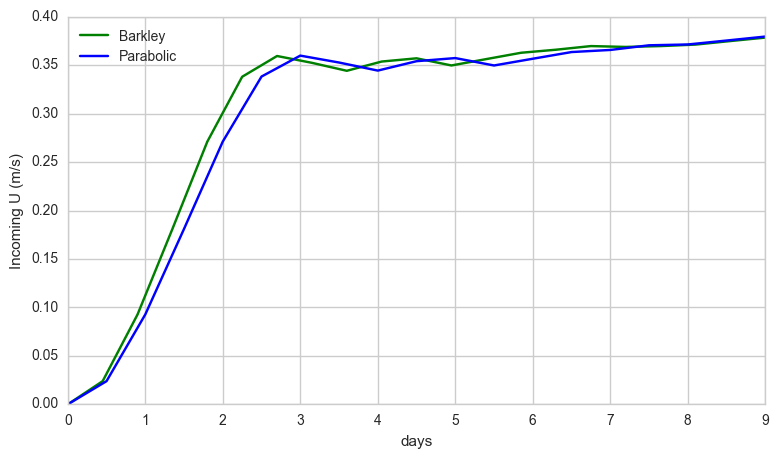

In [12]:
sns.set_context('notebook')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,5), sharey = True)


filestate1 = ('/data/kramosmu/results/TracerExperiments/BARKLEY/run01/stateGlob.nc') 
filestate2 = ('/data/kramosmu/results/TracerExperiments/CNTDIFF_7Tr/run01/stateGlob.nc') 
                
with Dataset(filestate1, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,21),np.mean(np.mean(u_ts,axis=1),axis=1),color='green',label="Barkley")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Barkley', u_mean, u_std))

with Dataset(filestate2, 'r') as nbl:
    u_ts = nbl.variables['U'][:,16:21,230:251,120]
    u_mean = np.mean(nbl.variables['U'][6:18,16:21,230:251,120])
    u_std = np.std(nbl.variables['U'][6:18,16:21,230:251,120])
        
ax.plot(np.linspace(0,9,19),np.mean(np.mean(u_ts,axis=1),axis=1),color='blue',label="Parabolic")
print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$' % ('Parabolic', u_mean, u_std))

ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)    